In [1]:
import random
import string
import timeit
import matplotlib.pyplot as plt

from numpySw import *
from parallelSw import *
from numbaSw import *

# Benchmarking Smith Watermann (CPU ONLY)

`In this experiment we compare the runtime performance of Smith Watermann algorithm implemented with highly efficient methods.`<br><br>
We compare smith watermann implemented efficiently in the following methods:
1. Exploiting parallelization with the concurrent library.
2. Exploiting vectorization with numpy library.
3. Exploiting vectorization alongside Just In Time compiler,<br>
Numba which translates Python functions to optimized machine<br>
code at runtime using the industry-standard LLVM compiler library.

In [2]:
def generate_random_sequence(length):
    return ''.join(random.choices(string.ascii_uppercase, k=length))

def run_comparison(seq1, seq2):
    print(f"Sequence lengths: {len(seq1)}, {len(seq2)}")

    start_time = timeit.default_timer()
    score_matrix_parallel, max_score_parallel, max_pos_parallel = smith_waterman_parallel(seq1, seq2, num_threads=20)
    end_time = timeit.default_timer()
    parallel_time = end_time - start_time
    print(f"Parallel implementation time: {end_time - start_time:.5f} seconds")

    start_time = timeit.default_timer()
    score_matrix_vectorized, max_score_vectorized, max_pos_vectorized = smith_waterman_vectorized(seq1, seq2)
    end_time = timeit.default_timer()
    vectorized_time = end_time - start_time
    print(f"Vectorized implementation time: {end_time - start_time:.5f} seconds")
    
    start_time = timeit.default_timer()
    score_matrix_vectorized, max_score_vectorized, max_pos_vectorized = smith_waterman_numba(seq1, seq2)
    end_time = timeit.default_timer()
    numba_time = end_time - start_time
    print(f"Numba implementation time: {end_time - start_time:.5f} seconds")

    print()
    return parallel_time, vectorized_time, numba_time

In [6]:
seq_sizes = np.arange(100, 4000, 100)
p_perf = []
v_perf = []
numba_perf = []
for seq_size in seq_sizes:

    seq1 = generate_random_sequence(seq_size)
    seq2 = generate_random_sequence(seq_size)
    p_perf_elem, v_perf_elem, numba_perf_elem = run_comparison(seq1, seq2)
    p_perf.append(p_perf_elem)
    v_perf.append(v_perf_elem)
    numba_perf.append(numba_perf_elem)

Sequence lengths: 100, 100
Parallel implementation time: 0.01092 seconds
Vectorized implementation time: 0.00665 seconds
Numba implementation time: 0.00127 seconds

Sequence lengths: 200, 200
Parallel implementation time: 0.03260 seconds
Vectorized implementation time: 0.02677 seconds
Numba implementation time: 0.00483 seconds

Sequence lengths: 300, 300
Parallel implementation time: 0.06876 seconds
Vectorized implementation time: 0.05893 seconds
Numba implementation time: 0.01069 seconds

Sequence lengths: 400, 400
Parallel implementation time: 0.12431 seconds
Vectorized implementation time: 0.10616 seconds
Numba implementation time: 0.01867 seconds

Sequence lengths: 500, 500
Parallel implementation time: 0.18793 seconds
Vectorized implementation time: 0.17980 seconds
Numba implementation time: 0.02861 seconds

Sequence lengths: 600, 600
Parallel implementation time: 0.27237 seconds
Vectorized implementation time: 0.24035 seconds
Numba implementation time: 0.04058 seconds

Sequence l

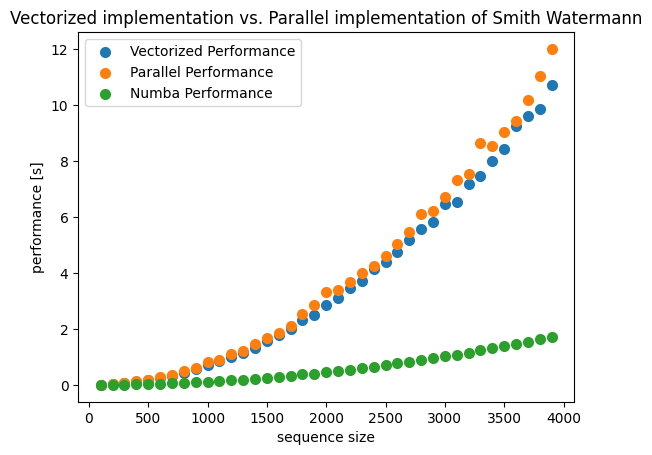

In [7]:
import matplotlib

fig, ax = plt.subplots()

# ax.scatter(seq_sizes, v_perf, linewidth=2, label="Vectorized Performance")
# ax.scatter(seq_sizes, p_perf, linewidth=2, label="Parallel Performance")
ax.scatter(seq_sizes, numba_perf, linewidth=2, label="Numba Performance")

# customize the plot
ax.set_title('Vectorized implementation vs. Parallel implementation of Smith Watermann')
ax.set_xlabel('sequence size')
ax.set_ylabel('performance [s]')
ax.legend(loc='best')

# display the plot
plt.savefig("perf-comparison.png")